In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential

#### **Data Exploration & Preprocessing**

In [2]:
# Load the fashion_mnist dataset directly into training and testing dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to ensure a consistent scaling of pixel
X_train = X_train / 255.0
X_test = X_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
# Count the samples in each training and testing sets
shape_df = pd.DataFrame({
    'Dataset': ['Train X', 'Test X', 'Train y', 'Test y'],
    'Shape': [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
})
shape_df

,Dataset,Shape
0,Train X,"(60000, 28, 28)"
1,Test X,"(10000, 28, 28)"
2,Train y,"(60000,)"
3,Test y,"(10000,)"


In [10]:
# Count the samples in each class in the training dataset
class_counts = {}
for label in y_train:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

class_data = [{'Class': label, 'Count': count} for label, count in class_counts.items()]
class_counts_df = pd.DataFrame(class_data)
class_counts_df

,Class,Count
0,9,6000
1,0,6000
2,3,6000
3,2,6000
4,7,6000
5,5,6000
6,1,6000
7,6,6000
8,4,6000
9,8,6000


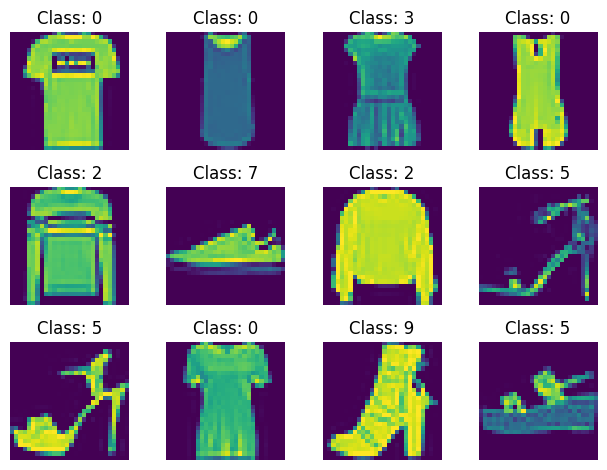

In [ ]:
# Visualise the training dataset
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.imshow(X_train[i])
    plt.title(f'Class: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Model Training**

In [ ]:
def build_model():
    model = Sequential()
    model.add(Input(shape=(28, 28)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(
                  optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

- Models without Early Stopping

In [39]:
# Train a model with 5 epochs
model_5 = build_model()
history_5 = model_5.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=0)

In [40]:
# Train a model with 10 epochs
model_10 = build_model()
history_10 = model_5.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

In [41]:
# Train a model with 20 epochs
model_20 = build_model()
history_20 = model_20.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)

In [42]:
# Train a model with 50 epochs
model_50 = build_model()
history_50 = model_50.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [43]:
# Train 2nd model with 50 epochs (for consistency comparison)
model_50_v2 = build_model()
history_50_v2 = model_50_v2.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [44]:
# Train 3rd model with 50 epochs (for consistency comparison)
model_50_v3 = build_model()
history_50_v3 = model_50_v3.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

- Models with Early Stopping

In [45]:
# Train a model with 50 epochs that will stop if there are no improvement within 5 epochs
model_50_s5 = build_model()
history_50_s5 = model_50_s5.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=5))

In [46]:
# Train a model with 50 epochs that will stop if there are no improvement within 10 epochs
model_50_s10 = build_model()
history_50_s10 = model_50_s10.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=10))


In [47]:
# Train a model with 50 epochs that will stop if there are no improvement within 15 epochs
model_50_s15 = build_model()
history_50_s15 = model_50_s15.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=15))

In [48]:
# Train a model with 50 epochs that will stop if there are no improvement within 20 epochs
model_50_s20 = build_model()
history_50_s20 = model_50_s20.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=EarlyStopping(patience=20))

#### **Model Visualization**

In [ ]:
# Plot the model loss and accuracy over the number of epoch
def plot_loss_and_accuracy(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Loss on the first subplot (ax1)
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title(f'{title} - Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    # Plot Accuracy on the second subplot (ax2)
    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='lower right')

    plt.show()

# Plot the model loss and accuracy over the number of epoch in the same chart
def plot_models_loss_and_accuracy(histories, title, labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plot Loss on the first subplot (ax1)
    for history, label in zip(histories, labels):
        ax1.plot(history.history['loss'], label=f'{label} Train')
        ax1.plot(history.history['val_loss'], label=f'{label} Validation', linestyle='--')

    ax1.set_title(f'{title} - Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper right')

    # Plot Accuracy on the second subplot (ax2)
    for history, label in zip(histories, labels):
        ax2.plot(history.history['accuracy'], label=f'{label} Train')
        ax2.plot(history.history['val_accuracy'], label=f'{label} Validation', linestyle='--')

    ax2.set_title(f'{title} - Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='lower right')

    plt.show()

- Models without Early Stopping

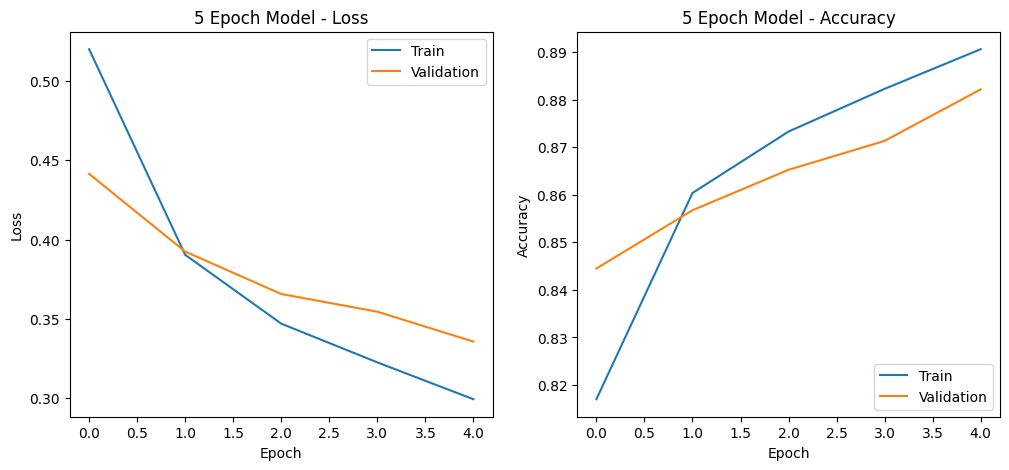

In [50]:
plot_loss_and_accuracy(history_5, '5 Epoch Model')

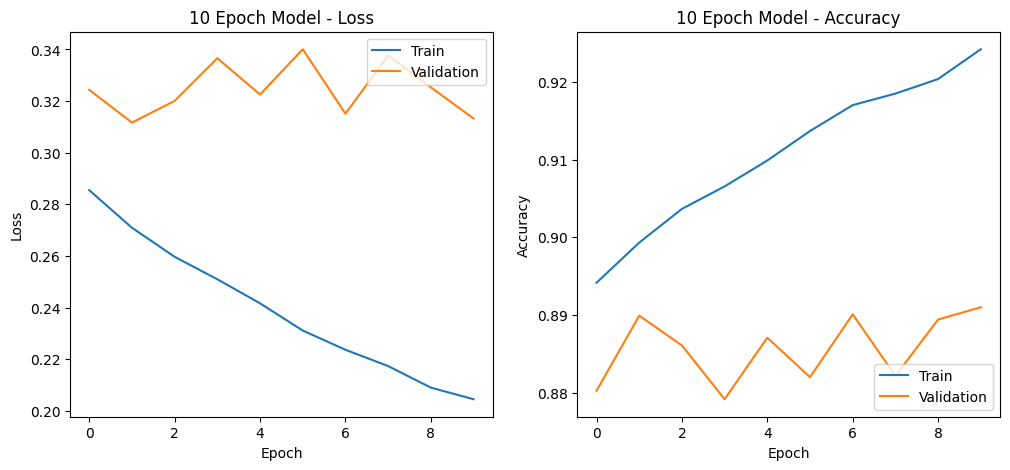

In [51]:
plot_loss_and_accuracy(history_10, '10 Epoch Model')

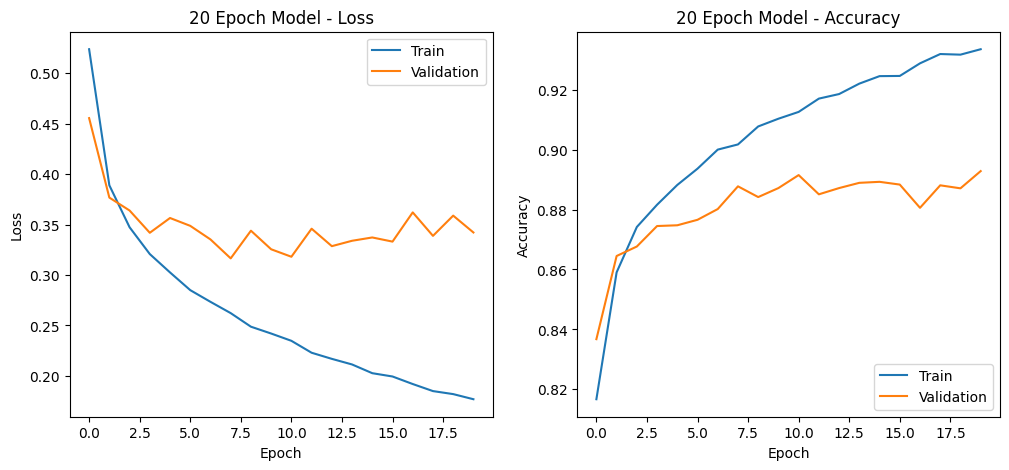

In [52]:
plot_loss_and_accuracy(history_20, '20 Epoch Model')

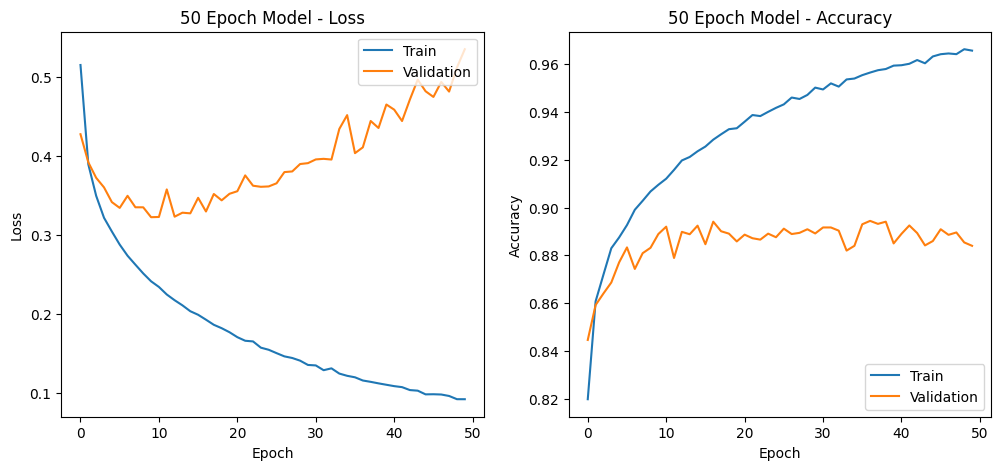

In [53]:
plot_loss_and_accuracy(history_50, '50 Epoch Model')

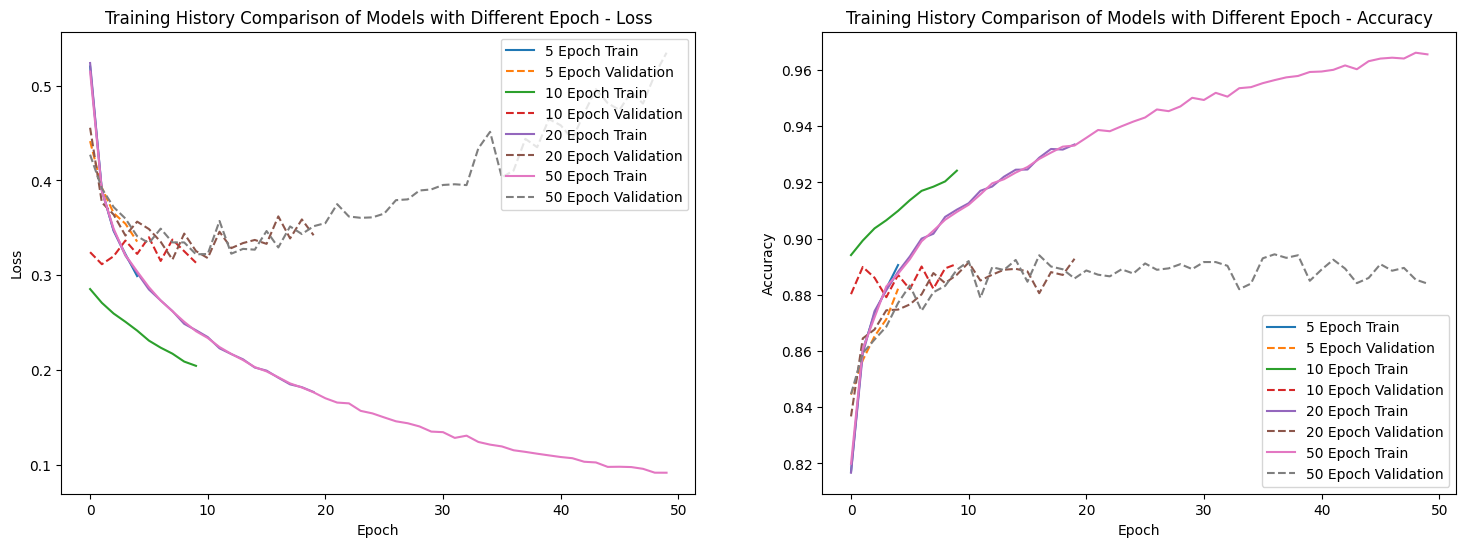

In [ ]:
# Plot the training history at the same chart
""" This chart shows that unlike some traditional machine learning models, training a 
    neural network model does produce different performance for each iteration, 
    but the variance is minimal and nearly identical, specially in training scores. """
histories = [history_5, history_10, history_20, history_50]
labels = ['5 Epoch',
          '10 Epoch',
          '20 Epoch',
          '50 Epoch']
plot_models_loss_and_accuracy(histories, 'Training History Comparison of Models with Different Epoch', labels)

- Models with Different Training Iteration

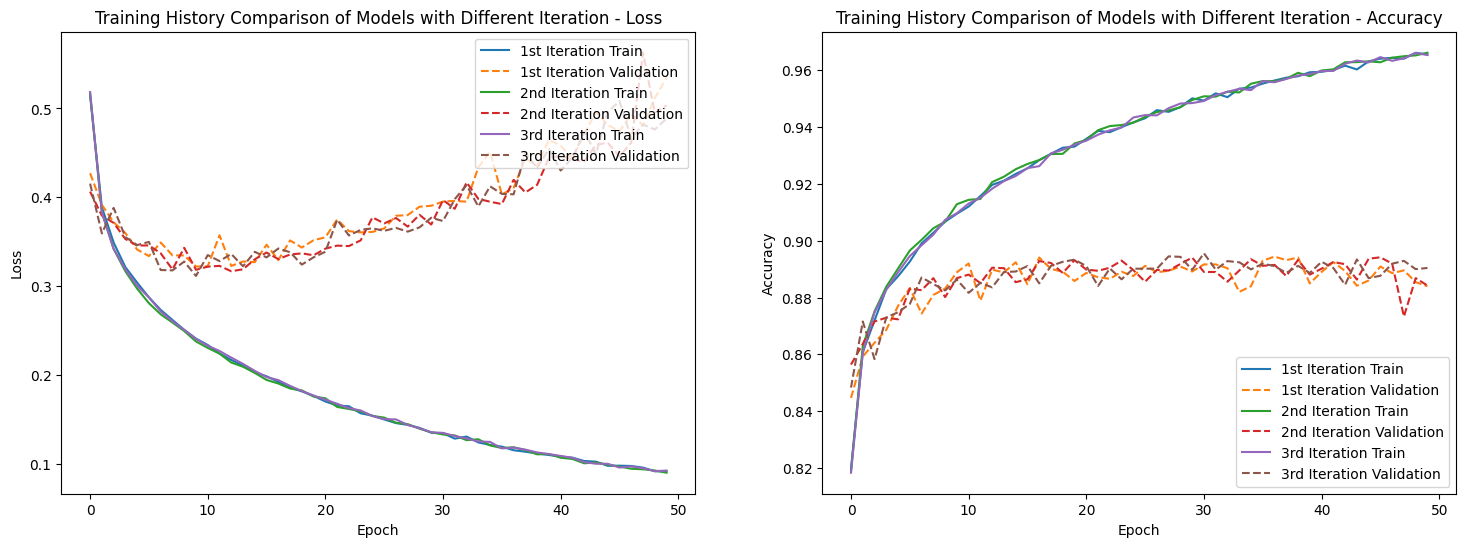

In [55]:
# Plot the training history at the same chart
histories = [history_50, history_50_v2, history_50_v3]
labels = ['1st Iteration',
          '2nd Iteration',
          '3rd Iteration']
plot_models_loss_and_accuracy(histories, 'Training History Comparison of Models with Different Iteration', labels)

- Models with Early Stopping

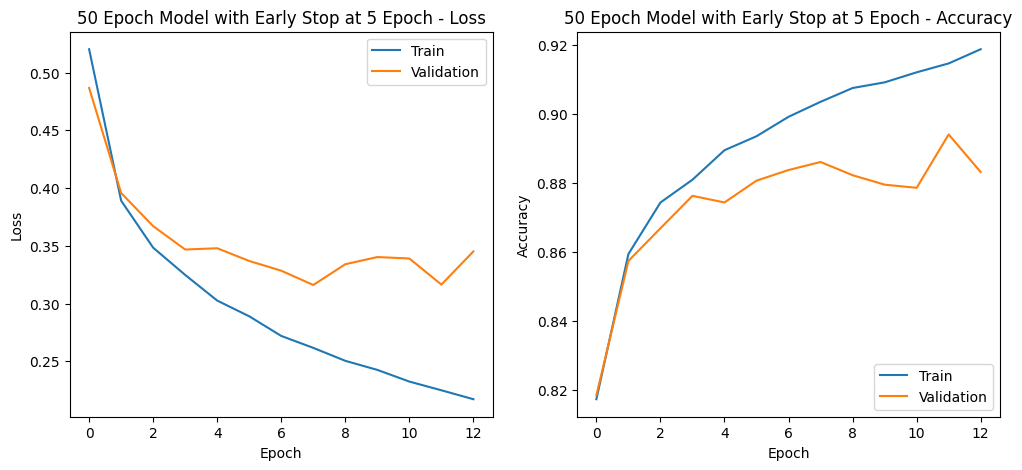

In [56]:
plot_loss_and_accuracy(history_50_s5, '50 Epoch Model with Early Stop at 5 Epoch')

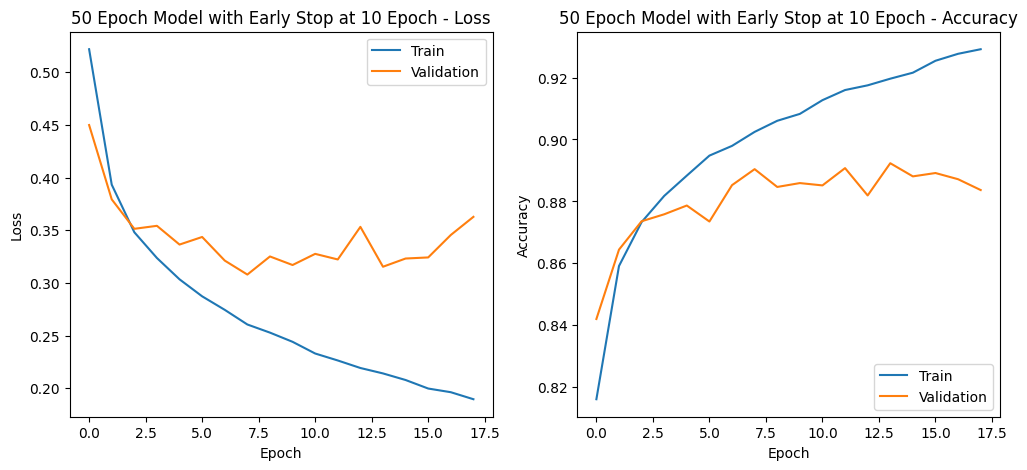

In [57]:
plot_loss_and_accuracy(history_50_s10, '50 Epoch Model with Early Stop at 10 Epoch')

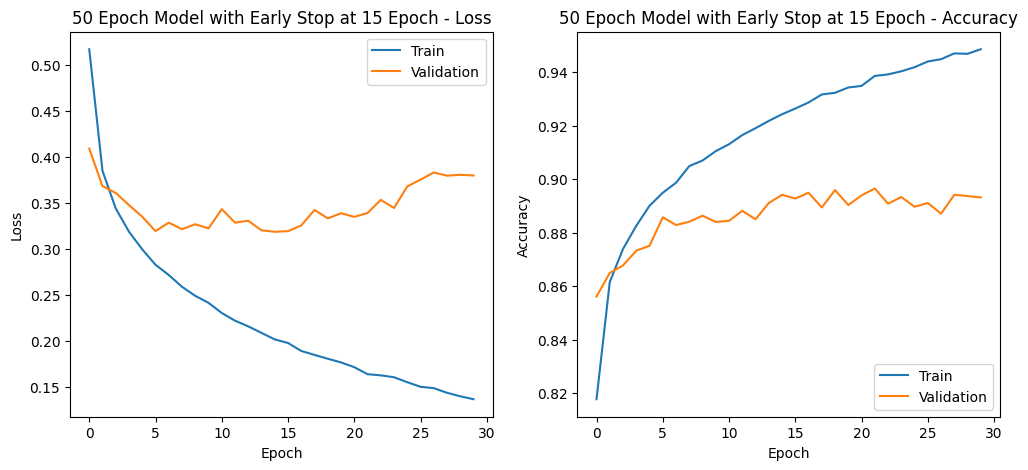

In [58]:
plot_loss_and_accuracy(history_50_s15, '50 Epoch Model with Early Stop at 15 Epoch')

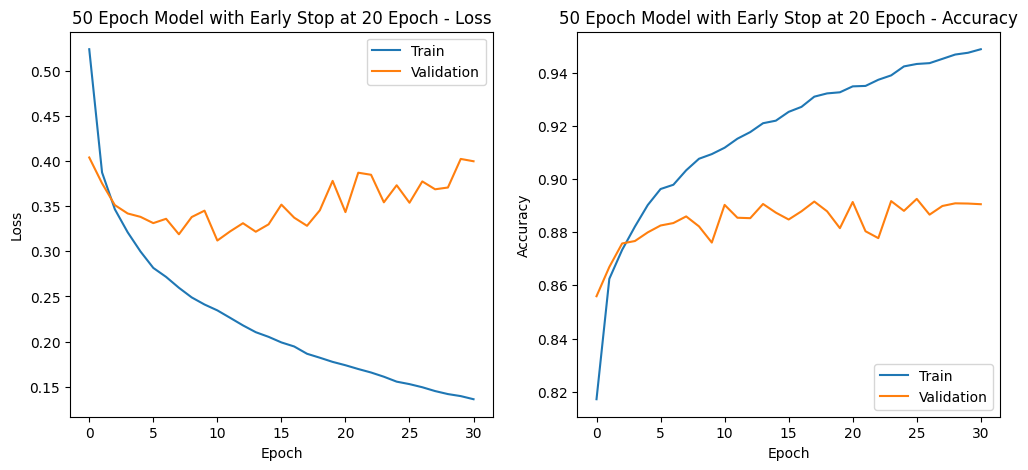

In [59]:
plot_loss_and_accuracy(history_50_s20, '50 Epoch Model with Early Stop at 20 Epoch')

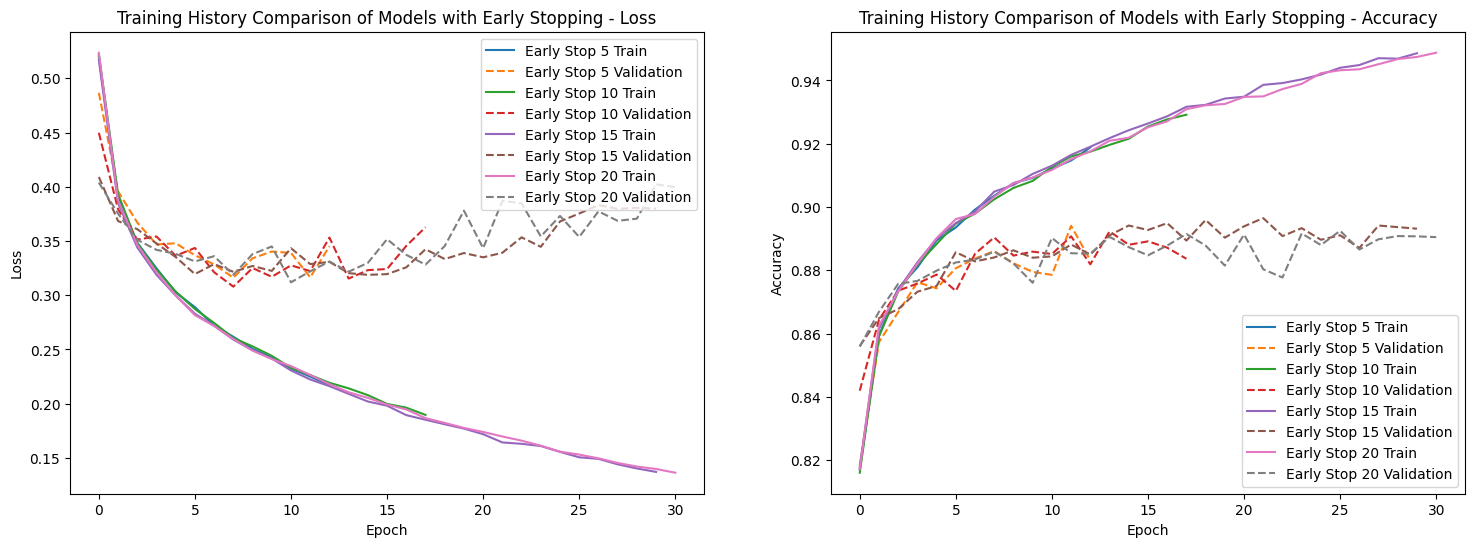

In [60]:
# Plot the training history at the same chart
histories = [history_50_s5, history_50_s10, history_50_s15, history_50_s20]
labels = ['Early Stop 5',
          'Early Stop 10',
          'Early Stop 15',
          'Early Stop 20']
plot_models_loss_and_accuracy(histories, 'Training History Comparison of Models with Early Stopping', labels)

In [70]:
# Evaluate the range of the best epoch
stopping_epoch = [len(history_50_s5.history['loss']),
                  len(history_50_s10.history['loss']),
                  len(history_50_s15.history['loss']),
                  len(history_50_s20.history['loss'])]
patience = [5, 10, 15, 20]
best_epoch = []

for i in range(len(stopping_epoch)):
    best_epoch.append(stopping_epoch[i] - patience[i])

stopping_epochs_df = pd.DataFrame({
    'Model': ['5 Epoch', '10 Epoch', '20 Epoch', '50 Epoch'],
    'Patience': [5, 10, 15, 20],
    'Early Stop At': stopping_epoch,
    'Best Epoch': best_epoch
})
stopping_epochs_df

,Model,Patience,Early Stop At,Best Epoch
0,5 Epoch,5,13,8
1,10 Epoch,10,18,8
2,20 Epoch,15,30,15
3,50 Epoch,20,31,11


#### **Final Evaluation**
- The results suggest that the optimal epoch can be find at 8th to 15th epoch.
- This also proves why the validation loss increase and the validation accuracy stabilize after 15 epochs.
- Increasing the number of epoch like 50, doesn't increase the performance of the model, instead, the model becomes overfitted.
